In [2]:
import torch

In [3]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [4]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [5]:
torch.mv(A,x)

tensor([ 14,  38,  62,  86, 110])

# autograd

In [11]:
x = torch.arange(4.0,requires_grad=True)
y = x * x
u = y.detach()
u

tensor([0., 1., 4., 9.])

In [12]:
z = u*x
z.sum().backward()

In [13]:
x.grad

tensor([0., 1., 4., 9.])

## 线性回归

In [1]:
import random
import torch
import matplotlib.pyplot as plt
def synthetic_data(w, b, num_samples):
    X = torch.normal(0, 1, (num_samples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

In [2]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

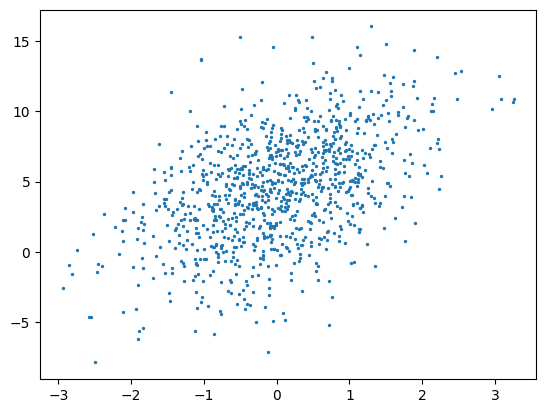

In [10]:
plt.scatter(features[:,0].detach().numpy(), labels.detach().numpy(), 2)

In [12]:
a = torch.ones((5,4))
b = torch.ones((4,3))
a, b, torch.matmul(a,b)

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]))

In [14]:
b = torch.tensor([2, -3.4])
a = torch.ones((5,2))
a, b, torch.matmul(a, b)

(tensor([[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]),
 tensor([ 2.0000, -3.4000]),
 tensor([-1.4000, -1.4000, -1.4000, -1.4000, -1.4000]))

In [5]:
def data_iter(batch_size, features, labels):
    num_samples = len(features)
    indices = list(range(num_samples))
    random.shuffle(indices) # 随机读取样本，没有特定顺序
    for i in range(0, num_samples, batch_size): # 每隔batch_size的间隔 来索引切片
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_samples)])
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for params in params:
            params -= lr * params.grad / batch_size
            params.grad.zero_()

In [7]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_loss.mean()):f}')

epoch1, loss 0.059295
epoch2, loss 0.000291
epoch3, loss 0.000049


In [8]:
w,b

(tensor([[ 2.0001],
         [-3.3992]], requires_grad=True),
 tensor([4.1984], requires_grad=True))

In [25]:
from torch.utils import data
import torch.nn as nn

In [26]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个pytorch的数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [27]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
data_iter

In [30]:
iter(data_iter).__next__()

[tensor([[ 0.5146, -0.8419],
         [ 0.1340, -0.2181],
         [-0.1419,  1.3749],
         [ 1.7035, -0.5916],
         [-0.8631, -0.3733],
         [ 0.5435, -1.7517],
         [ 0.4328,  0.0826],
         [-0.2175, -0.7467],
         [ 1.0011, -0.3675],
         [-2.0334,  1.3332]]),
 tensor([[ 8.0889],
         [ 5.2375],
         [-0.7562],
         [ 9.5913],
         [ 3.7273],
         [11.2380],
         [ 4.7763],
         [ 6.3062],
         [ 7.4520],
         [-4.3917]])]

In [37]:
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()  # step 可以进行模型的更新
    l = loss(net(features), labels)
    print(f'epoch{epoch+1}, loss{l:f}')

epoch1, loss0.000512
epoch2, loss0.000097
epoch3, loss0.000096


In [35]:
net[0].weight.data

tensor([[-0.0067, -0.0047]])

In [36]:
net[0].bias.data

tensor([0.])

In [18]:
import matplotlib.pyplot as plt
import torch
data = torch.normal(5, 10, (20, 2))
data

tensor([[ 13.8125,  14.3486],
        [ -3.8203,  -3.3459],
        [ -0.6323,   4.6456],
        [  8.9148,   9.9661],
        [ 10.0773,  19.7192],
        [  7.9126,   1.3014],
        [ -1.6712,  -8.6893],
        [ -1.4102,  16.0837],
        [  0.0462,   7.4516],
        [  7.6993, -10.4310],
        [ 17.6063,   7.0790],
        [ -1.7090, -13.4953],
        [ 19.0470,  -3.1320],
        [ -0.3483,  19.5854],
        [ 10.2695,   5.7373],
        [  7.6319,  -3.3667],
        [ 15.7076, -12.8429],
        [ 10.5210,  -4.5463],
        [ 13.5534,   0.5722],
        [  3.3134, -14.7207]])

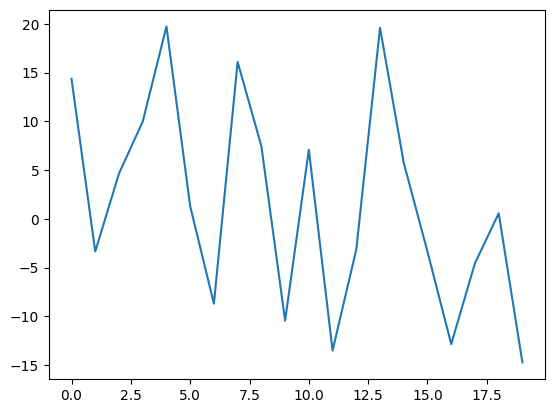

In [19]:
plt.plot(data[:,1])

C:\ProgramData\anaconda3\envs\sd-torch2.0\lib\site-packages\numpy\core\shape_base.py:121: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
C:\ProgramData\anaconda3\envs\sd-torch2.0\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

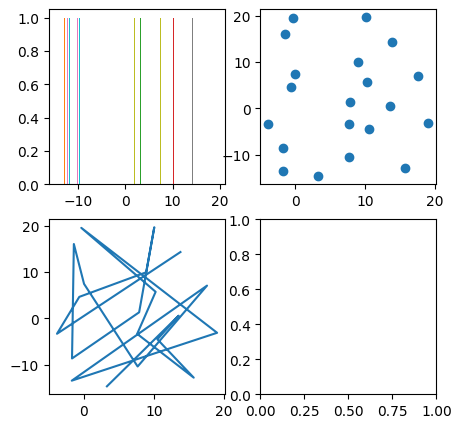

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (5, 5))
axes[0, 0].hist(data[:, 1])
axes[0, 1].scatter(data[:, 0], data[:, 1])
axes[1, 0].plot(data[:, 0], data[:, 1])
axes[1, 1].hist2d(data[:, 0], data[:, 1])

In [34]:
import pandas as pd
data = pd.read_csv("C:\\Users\\84457\\Desktop\\des.csv")
data

,ID,Open,Close
0,1,100,90
1,2,110,120
2,3,130,140
3,4,150,160
4,5,170,180
5,6,190,200
6,7,210,220
7,8,230,240
8,9,250,260
9,10,270,280


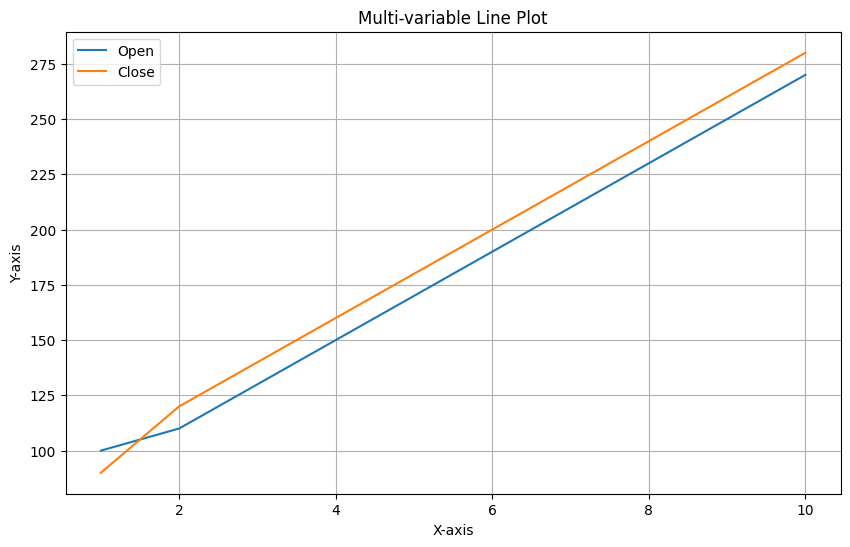

In [35]:
x_values = data["ID"]

# 获取多个 y 值列的列名
y_columns = data.columns[1:]  # 假设从第二列开始是 y 值列

# 绘制多变量折线图
plt.figure(figsize=(10, 6))  # 可选：设置图表的大小

for column in y_columns:
    y_values = data[column]
    plt.plot(x_values, y_values, label=column)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multi-variable Line Plot")
plt.legend()  # 添加图例
plt.grid(True)
plt.show()